# Feature Analysis

In [1]:
import pandas as pd
import math

In [2]:
#filenames1 = ['pionminus','pionminus1','pionminus2','pionminus3','pionminus4','pionminus5']
#filenames1 = ['ccbar0']
#filenames1 = ['ccbar0','phi0']
#filenames1 = ['ccbar_20M','phi0']
#filenames1 = ['phi_new00','ccbar_new00','bbbar_new00']#,
#filenames2 = ['photon_100M_v0','photon_100M_v1']
#filenames2 = ['photon_100M_new_v0','photon_100M_new_v1','photon_100M_new_v2']
#filenames2 = ['photon_new00','photon_new10','photon_new20','photon_new30','photon_new40','photon_new50']
filenames2 = ['dalitz_25M_v0']
filenames1 = ['ccbar_hits0','bbbar_hits0','electron_hits0','positron_hits0']#,'ccbar_new00'
filenames2 = ['photon_hits0','photon_hits1','photon_hits2','photon_hits3','photon_hits4','photon_hits5']
filenames2 = ['photon_new00','photon_new10','photon_new20','photon_new30','photon_new40','photon_new50','photon_new50']

dalitz = ['dalitz_new00']
dalitz = ['dalitz_new10']
do_dalitz = 0

filepath = "/home/yoren/bnl/PHENIX/ee/ML/"

hadron_weight = 100*120/48

In [ ]:
if True:
    data = pd.read_csv(filepath+f'{filenames1[0]}.csv')
    for ifile in range(1,len(filenames1)):
        idata = pd.read_csv(filepath+f'{filenames1[ifile]}.csv')
        data = pd.concat([data,idata], sort=False)
    data.loc[data['IsTrue0'] > -99, 'IsTrue0'] = 1

    for ifile in range(0,len(filenames2)):
        idata = pd.read_csv(filepath+f'{filenames2[ifile]}.csv')
        idata.loc[idata['IsTrue0'] > -99, 'IsTrue0'] = 0
        data = pd.concat([data,idata], sort=False)

    if do_dalitz:
        dalitzdata = pd.read_csv(filepath+f'{dalitz[0]}.csv')
        dalitzlen = int(dalitzdata.shape[0]*1.174e-2*6*50/25/5)
        dalitzdata = dalitzdata[:dalitzlen]
        dalitzdata.loc[dalitzdata['IsTrue0'] > -99, 'IsTrue0'] = 0
        data = pd.concat([data,dalitzdata], sort=False)

    data = data.sample(frac = 1)
    float_columns=('Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore',\
                   'reconpt','reconphi0','reconthe0','px','py','pz','vx','vy','vz',\
                   'sdphi0','sdthe0','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01',\
                   'sdphi1','sdthe1','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11',\
                   'sdphi2','sdthe2','SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21',\
                   'sdphi3','sdthe3','SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31')
    int_columns=('NBDThit','Centrality', 'Charge', 'Arm','IsTrue0','IsTrue1','IsTrue2','IsTrue3')
    
    for float_column in float_columns:
        data[float_column] = data[float_column].astype('float16')
    for int_column in int_columns:
        data[int_column] = data[int_column].astype('int32')
        
    data = data[(data['Pt'] > 0.4) & (data['Pt'] < 25) & (data['Ecore'] > 0.1) & (data['Ecore'] < 25) & (data['reconthe0'] < 25) & (data['reconthe0'] < 25) & (data['reconpt'] < 999)  ]

    data['sdphi0'] = data['sdphi0'] - data['sdphi1']

    #data['The0'] = data['The0'].apply(lambda x: math.sqrt( (float) ( 1.+1./math.tan(x)/math.tan(x) ) )) 
    #data['Ecore'] = (data['Ecore']*data['The0']-data['reconpt']) / data['Ecore']
    data['reconpt'] = (data['Pt']-data['reconpt'])/data['Pt']
    #data['The0'] = data['The0'].apply(lambda x: math.sqrt( (float) ( 1.+1./math.tan(x)/math.tan(x) ) )) 
    #data['Ecore'] = data['Ecore']*data['The0']
    #data['Ecore1'] = data['Ecore']-data['reconpt']
    #data['Ecore2'] = data['Ecore1']/data['Ecore']
    #data['reconpt1'] = data['Pt']-data['reconpt']
    #data['reconpt2'] = data['reconpt1']/data['Pt']
    #data['reconphi0'] = (data['reconphi0'] - data['Phi0'])*data['Charge']

/home/yoren/.local/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


In [4]:
secondhitcolumns = ['SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01',\
                    'SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11',\
                    'SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21',\
                    'SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31']
for secondhitname in secondhitcolumns:
    data.loc[data[secondhitname] < -99, secondhitname] = -99
    data.loc[data[secondhitname] >  99, secondhitname] = -99

In [5]:
data.head()

NBDThit        Pt      Phi0      The0     PhiDC        ZDC     Alpha  \
1292657        3  0.948242  3.128906  1.428711  2.908203  31.125000  0.110901   
353488         3  0.440186  1.215820  1.369141  0.743164  44.312500  0.237915   
325799         1  1.053711  2.134766  1.777344  2.333984 -45.718750 -0.102722   
3033349        3  0.444824  0.958984  1.864258  0.470459 -64.062500  0.247681   
731460         1  0.522949  3.039062  1.599609  3.431641  -6.226562 -0.194702   

            Ecore  Centrality  Charge  ...    sdthe3  IsTrue3  SecondHitPhiR3  \
1292657  0.890137          31      -1  ...  0.297607        1         -0.0000   
353488   0.352539          49      -1  ... -0.458252        0        -20.5625   
325799   1.186523          79       1  ... -1.124023        0        -99.0000   
3033349  0.488525          44      -1  ... -0.104675        0        -99.0000   
731460   0.456055          90       1  ...  0.051758        0        -99.0000   

         SecondHitPhiL3  SecondHitTheR3  SecondHitTheL3  SecondHitPhiR31  \
1292657           -99.0       -5.902344           -99.0        -6.308594   
353488            -99.0        1.640625           -99.0       -99.000000   
325799            -99.0      -99.000000           -99.0       -99.000000   
3033349           -99.0      -99.000000           -99.0       -99.000000   
731460            -99.0      -99.000000           -99.0       -99.000000   

         SecondHitPhiL31  SecondHitTheR31  SecondHitTheL31  
1292657            -99.0         16.59375            -99.0  
353488             -99.0        -99.00000            -99.0  
325799             -99.0        -99.00000            -99.0  
3033349            -99.0        -99.00000            -99.0  
731460             -99.0        -99.00000            -99.0  

[5 rows x 64 columns]

In [6]:
#data = data[11023232:]
print(data.size, data.shape)

704801024 (11012516, 64)


In [7]:
# удалим лишние колонки
data = data.drop(columns = ['IsTrue1','IsTrue2','IsTrue3','px','py','pz','vx','vy','vz','sdphi1','sdphi2','sdphi3','sdthe0','sdthe1','sdthe2','sdthe3','reconphi0','reconthe0','Phi0', 'The0', 'PhiDC', 'ZDC'])
#data = data.drop(columns = ['IsTrue1','IsTrue2','IsTrue3','px','py','pz','vx','vy','vz','reconthe0','Phi0', 'The0', 'PhiDC', 'ZDC'])
data = data.drop(columns = ['Alpha','NBDThit', 'Arm'] )
#data = data.drop(columns=  ['SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01'])
#data = data.drop(columns=  ['SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11'])
#data = data.drop(columns=  ['SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21'])
#data = data.drop(columns=  ['SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31'])


In [8]:
import matplotlib.pyplot as plt

def analysis(data: pd.DataFrame):
    fig, ax = plt.subplots(4, 3, figsize=(15, 6))
    for i, feature in enumerate(['IsTrue0', 'Pt', 'SecondHitPhiR01', 'SecondHitPhiL01','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1' ]):
        x, y = divmod(i, 3)
        data[feature].plot.hist(ax=ax[x][y], ylabel='', title=feature, color='skyblue', logy=True)


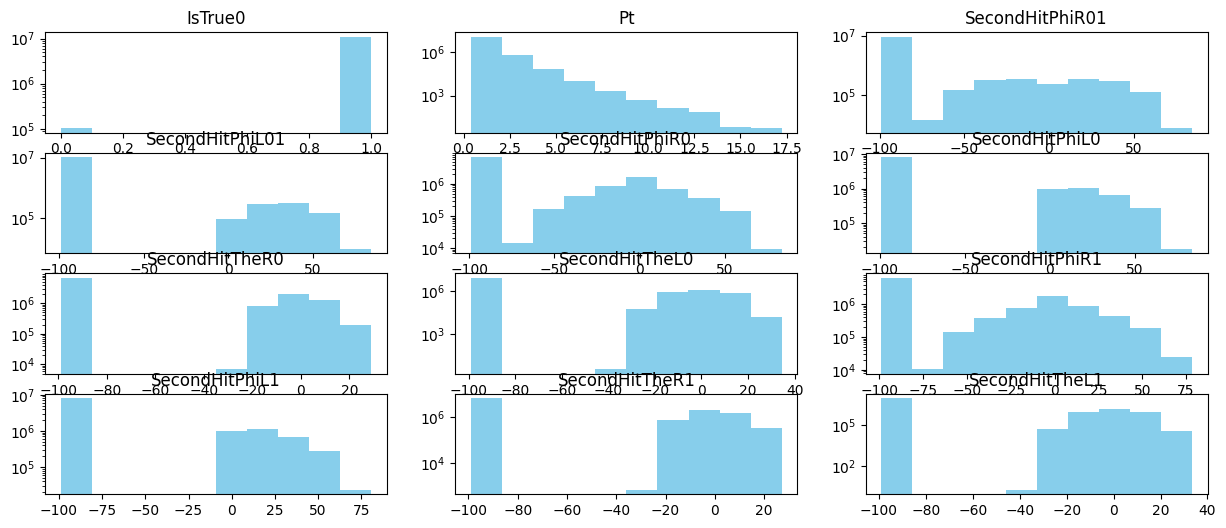

In [9]:
analysis(data)

+ Видим, что impressions имеют только одно значение, поэтому их можно удалить.
+ Таргет-переменная clicks сильно несбалансирована. Возможно, стоит использовать балансировку весов, а также в качестве оценки моделей использовать f1 и ROC AUC.
+ У campaign_clicks нулевых значений сильно больше, чем ненулевых, следовательно, можно трансформировать в бинарную фичу
+ os_id со значениями больше 6 встречается редко, можно объединить в одну категорию
+ Аналогично с редкими значениями zone_id

# Feature Engineering

In [10]:
def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    # делим выборку на train и test
    #data = data.sort_values(by='date_time', ignore_index=True)
    #cut_off_val = data[data['date_time'] < pd.to_datetime('2021-10-01')].index[-1]
    #cut_off_test = data[data['date_time'] < pd.to_datetime('2021-10-02')].index[-1]

    cut_off_val =  int (data.shape[0]/2)
    cut_off_test = int (data.shape[0]/4*3 + 1)

    print(cut_off_val,cut_off_test)
    all_test = data[cut_off_test:]
    y = data['IsTrue0']
    data = data.drop(columns = ['IsTrue0'])
    data = data.drop(columns = ['Centrality','Pt','Ecore'])
    #data = data.drop(columns = ['sdphi0','sdphi1','sdphi2','sdphi3'])
    data_train, data_test = data[:cut_off_test], data[cut_off_test:]
    y_train, y_test = y.iloc[:cut_off_test], y.iloc[cut_off_test:]
    
    # делаем one hot encodings
    #enc = OneHotEncoder(drop='first', handle_unknown='ignore')
    #enc.fit(data_train)
    #transformed_train = enc.transform(data_train)
    #transformed_test = enc.transform(data_test)
    
    return data_train, data_test, y_train, y_test, all_test

In [11]:
X_train_all, X_test, y_train_all, y_test, all_test = feature_engineering(data)

5506258 8259388


In [12]:
X_test

Charge   reconpt    sdphi0  SecondHitPhiR0  SecondHitPhiL0  \
2570335      -1  0.015007 -0.171021       10.976562       10.992188   
4480548       1 -0.070679 -0.057617      -99.000000      -99.000000   
242721        1  0.310059 -0.373047      -99.000000      -99.000000   
2594960       1 -0.153809  0.088135      -99.000000      -99.000000   
603514       -1 -0.082764  0.060059      -99.000000      -99.000000   
...         ...       ...       ...             ...             ...   
1974204      -1 -0.049103 -0.329834      -99.000000      -99.000000   
295890       -1  0.132690 -1.873047        6.976562        6.980469   
2830747       1  0.059479  0.283203      -99.000000      -99.000000   
2347749      -1 -0.145752  0.560547      -13.218750      -99.000000   
2157812       1 -0.186646  0.272705      -99.000000      -99.000000   

         SecondHitTheR0  SecondHitTheL0  SecondHitPhiR01  SecondHitPhiL01  \
2570335       -3.746094       -3.746094            -99.0            -99.0   
4480548      -99.000000      -99.000000            -99.0            -99.0   
242721       -99.000000      -99.000000            -99.0            -99.0   
2594960      -99.000000      -99.000000            -99.0            -99.0   
603514       -99.000000      -99.000000            -99.0            -99.0   
...                 ...             ...              ...              ...   
1974204      -99.000000      -99.000000            -99.0            -99.0   
295890        -5.855469       -5.855469            -99.0            -99.0   
2830747      -99.000000      -99.000000            -99.0            -99.0   
2347749      -13.648438      -99.000000            -99.0            -99.0   
2157812      -99.000000      -99.000000            -99.0            -99.0   

         SecondHitTheR01  ...  SecondHitTheR21  SecondHitTheL21  \
2570335            -99.0  ...        -2.070312         0.615723   
4480548            -99.0  ...       -99.000000       -99.000000   
242721             -99.0  ...       -99.000000       -99.000000   
2594960            -99.0  ...       -99.000000       -99.000000   
603514             -99.0  ...       -99.000000       -99.000000   
...                  ...  ...              ...              ...   
1974204            -99.0  ...       -99.000000       -99.000000   
295890             -99.0  ...       -99.000000       -99.000000   
2830747            -99.0  ...       -99.000000       -99.000000   
2347749            -99.0  ...       -99.000000       -99.000000   
2157812            -99.0  ...       -99.000000       -99.000000   

         SecondHitPhiR3  SecondHitPhiL3  SecondHitTheR3  SecondHitTheL3  \
2570335      -99.000000       31.937500      -99.000000         -4.4375   
4480548       11.578125      -99.000000        0.937988        -99.0000   
242721       -99.000000      -99.000000      -99.000000        -99.0000   
2594960      -99.000000      -99.000000      -99.000000        -99.0000   
603514       -99.000000      -99.000000      -99.000000        -99.0000   
...                 ...             ...             ...             ...   
1974204      -99.000000      -99.000000      -99.000000        -99.0000   
295890        -7.605469        3.476562      -21.031250         16.1250   
2830747      -99.000000      -99.000000      -99.000000        -99.0000   
2347749      -24.062500      -99.000000       -6.500000        -99.0000   
2157812      -99.000000      -99.000000      -99.000000        -99.0000   

         SecondHitPhiR31  SecondHitPhiL31  SecondHitTheR31  SecondHitTheL31  
2570335          -99.000         33.37500       -99.000000         1.137695  
4480548          -99.000        -99.00000       -99.000000       -99.000000  
242721           -99.000        -99.00000       -99.000000       -99.000000  
2594960          -99.000        -99.00000       -99.000000       -99.000000  
603514           -99.000        -99.00000       -99.000000       -99.000000  
...                  ...              ...              ..

In [13]:
X_train = X_train_all
y_train = y_train_all
w_train = y_train-1
w_test = y_test-1
w_train_all = y_train_all - 1
w_train = w_train*(-hadron_weight)+1
w_test = w_test*(-hadron_weight)+1
w_train_all = w_train_all*(-hadron_weight)+1

+ Увидели, что количество кликов меняется в зависимости от дня недели и часа, добавим в качестве фичей
+ Также, добавим интеракции между этими двумя переменными, так как в разные дни недели разные часы могут по-разному влиять на колличество кликов
+ banner_id удалила, так как предполагаю, что модель должна уметь предсказывать клики для новых баннеров тоже.
+ Так как все оставшиеся фичи являются категориальными, сделали one-hot-encoding


+ В качестве теста берем последний день датасета, в качестве валидации -- предпоследний

# Create Model

In [14]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=4, learning_rate= 0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train, w_train)

predicted = gb_clf.predict(X_test)

# calculating the main quality metrics
print(metrics.classification_report(y_test, predicted))

print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

/home/yoren/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yoren/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.01      1.00      0.02     25666
           1       0.00      0.00      0.00   2727462

    accuracy                           0.01   2753128
   macro avg       0.00      0.50      0.01   2753128
weighted avg       0.00      0.01      0.00   2753128

confusion matrix
[[  25666       0]
 [2727462       0]]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# search for parameters
# https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv
import time
from sklearn.model_selection import GridSearchCV

start = time.time() 

parameters = {
    "loss":["log_loss"],
    "learning_rate": [0.2],
    "min_samples_split": [0.001],
    "max_depth":[12],
    "max_features":["sqrt"],
    "criterion": ['squared_error'],
    "n_estimators":[12]
    }

classif = GradientBoostingClassifier()
classif.set_params(init='zero')

clf = GridSearchCV(classif, parameters, cv=3, n_jobs=8)

clf.fit(X_train, y_train, sample_weight=w_train)
print('точность: ', clf.score(X_test, y_test))

# getting the best parameters ans score
print(clf.best_params_)
print(clf.best_score_)

stop = time.time()    
print('time of execution (sec)', stop - start)

точность:  0.7610427121441502
{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 0.001, 'n_estimators': 12}
0.7563835241861675
time of execution (sec) 403.1789071559906


# Cross Validation

In [16]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.03      0.91      0.07     25666
           1       1.00      0.76      0.86   2727462

    accuracy                           0.76   2753128
   macro avg       0.52      0.84      0.46   2753128
weighted avg       0.99      0.76      0.86   2753128



In [17]:
y_pred_probs = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# Model Evaluation

log loss: 0.3431829363109024
roc auc: 0.9316707273206217
f1 score: 0.9303355640829277


Text(0.5, 1.0, 'ROC AUC Curve')

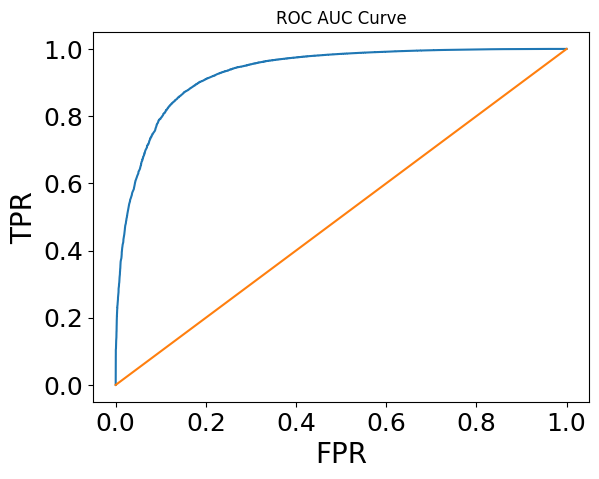

In [18]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, f1_score

print('log loss:', log_loss(y_test, y_pred_probs, sample_weight=w_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:, 1], pos_label=1, sample_weight=w_test)
metrics.auc(fpr, tpr)
print('roc auc:', metrics.auc(fpr, tpr))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_opt = y_pred_probs[:, 1] > optimal_threshold
print('f1 score:', f1_score(y_test, y_pred_opt))
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel("FPR", fontsize=20)
plt.ylabel("TPR", fontsize=20)
plt.xticks(fontsize = 18) 
plt.yticks(fontsize = 18) 
plt.title('ROC AUC Curve')

In [19]:
pred_baseline = np.ones_like(y_test) * y_test.mean()
print("baseline auc:", roc_auc_score(y_test, pred_baseline))
print("baseline log_loss:", log_loss(y_test, pred_baseline))

baseline auc: 0.5
baseline log_loss: 0.05286456133664778


In [20]:
i = 200000
print(round(tpr[i],3),round(fpr[i]/tpr[i],4))
print(thresholds[i],fpr[i],tpr[i])
#print((fpr[i]/tpr[i]*data1.shape[0]/data2.shape[0]/10)**-1,(fpr[i]/1.*data1.shape[0]/data2.shape[0]/10)**-1)

0.947 0.2904
0.2517563850356586 0.2748383074885062 0.9465041126145846


In [21]:
print(sum(predicted),len(predicted))

2074086 2753128


In [22]:
kek_data = data
kek_data = kek_data.drop(columns = ['IsTrue0'])
kek_data = kek_data.drop(columns = ['Centrality','Pt','Ecore'])
proba_loc = clf.predict_proba(kek_data)
print(proba_loc[0][1])

0.6784548127907521


In [23]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_Conv.root", "recreate")
e_pt_hist_AI = root.TH2D("e_pt_hist_AI", "e_pt_hist_AI", 50, 0, 5, 10, 0, 100)
h_pt_hist_AI = root.TH2D("h_pt_hist_AI", "h_pt_hist_AI", 50, 0, 5, 10, 0, 100)
e_pt_hist_SC = root.TH2D("e_pt_hist_SC", "e_pt_hist_SC", 50, 0, 5, 10, 0, 100)
h_pt_hist_SC = root.TH2D("h_pt_hist_SC", "h_pt_hist_SC", 50, 0, 5, 10, 0, 100)
e_pt_hist_NC = root.TH2D("e_pt_hist_NC", "e_pt_hist_NC", 50, 0, 5, 10, 0, 100)
h_pt_hist_NC = root.TH2D("h_pt_hist_NC", "h_pt_hist_NC", 50, 0, 5, 10, 0, 100)

Welcome to JupyROOT 6.30/06


In [24]:
mycute,mycuth, AIcute, AIcuth = 0.1, 0.1, 0.1, 0.1
norm_e, norm_h = 0.1, 0.1
data0 = data.reset_index()  # make sure indexes pair with number of rows

sigma, sigma_veto = 3, -2

pt = 0.
pt_prev = 0.
IsTrue0_prev = 1
IsTrue0 = 1
counter =-1
cont = 1
myml = 1
myml_now = 1
centrality, centralitynow = 0, 0
SecondHitPhiL0, SecondHitPhiL1, SecondHitPhiL2, SecondHitPhiL3 = 0,0,0,0
pSecondHitPhiL0, pSecondHitPhiL1, pSecondHitPhiL2, pSecondHitPhiL3 = 0,0,0,0
SecondHitTheL0, SecondHitTheL1, SecondHitTheL2, SecondHitTheL3 = 0,0,0,0
pSecondHitTheL0, pSecondHitTheL1, pSecondHitTheL2, pSecondHitTheL3 = 0,0,0,0
for index, row in data0.iterrows():
    counter+=1
    if counter>4000000: break
    SecondHitPhiL0loc, SecondHitPhiL1loc, SecondHitPhiL2loc, SecondHitPhiL3loc = row['SecondHitPhiL0'], row['SecondHitPhiL1'], row['SecondHitPhiL2'], row['SecondHitPhiL3']
    SecondHitTheL0loc, SecondHitTheL1loc, SecondHitTheL2loc, SecondHitTheL3loc = row['SecondHitTheL0'], row['SecondHitTheL1'], row['SecondHitTheL2'], row['SecondHitTheL3']
    sdthe0, sdthe1, sdthe2, sdthe3 = 0, 0, 0, 0
    centralityloc, ptloc, IsTrue0loc = row['Centrality'], row['Pt'], row['IsTrue0']
    if abs(pt -  ptloc) < 1e-6: 
        cont = 0
        myml_now*=proba_loc[counter][1]>thresholds[i]
    else: 
        pt_prev = pt
        pt = ptloc
        centrality = centralitynow
        centralitynow = centralityloc
        SecondHitPhiL0, SecondHitPhiL1, SecondHitPhiL2, SecondHitPhiL3 = pSecondHitPhiL0, pSecondHitPhiL1, pSecondHitPhiL2, pSecondHitPhiL3 
        pSecondHitPhiL0, pSecondHitPhiL1, pSecondHitPhiL2, pSecondHitPhiL3 = SecondHitPhiL0loc, SecondHitPhiL1loc, SecondHitPhiL2loc, SecondHitPhiL3loc
        SecondHitTheL0, SecondHitTheL1, SecondHitTheL2, SecondHitTheL3 = pSecondHitTheL0, pSecondHitTheL1, pSecondHitTheL2, pSecondHitTheL3 
        pSecondHitTheL0, pSecondHitTheL1, pSecondHitTheL2, pSecondHitTheL3 = SecondHitTheL0loc, SecondHitTheL1loc, SecondHitTheL2loc, SecondHitTheL3loc 
        IsTrue0 = IsTrue0_prev
        IsTrue0_prev = IsTrue0loc
        myml = myml_now
        myml_now = proba_loc[counter][1]>thresholds[i]
        cont = 1

    if not cont: continue
    if pt_prev<0.4 or centrality<0: continue
    
    if IsTrue0: e_pt_hist_NC.Fill(pt_prev,centrality)
    else:    h_pt_hist_NC.Fill(pt_prev,centrality)
    if not ( (SecondHitPhiL1>0 and SecondHitPhiL1<12.5 and abs(SecondHitTheL1)<12.5) \
            or (SecondHitPhiL2>0 and SecondHitPhiL2<25 and abs(SecondHitTheL2)<12.5) \
            or (SecondHitPhiL3>0 and SecondHitPhiL3<25 and abs(SecondHitTheL3)<12.5) ):
        if IsTrue0: 
            mycute+=1
            e_pt_hist_SC.Fill(pt_prev,centrality)
        else: 
            mycuth+=1+hadron_weight
            h_pt_hist_SC.Fill(pt_prev,centrality)
    if myml: 
        if IsTrue0: 
            AIcute+=1
            e_pt_hist_AI.Fill(pt_prev,centrality)
        else: 
            AIcuth+=1+hadron_weight
            h_pt_hist_AI.Fill(pt_prev,centrality)
    if IsTrue0: norm_e+=1
    else: norm_h+=1+hadron_weight
    #if counter<10: 
    #    print(proba_loc[counter],answer(centrality,pt,ep,n0,disp,chi2,npe0,prob))
        #print(centrality, pt, ep, n0, disp, chi2, npe0, prob, phi0 )

In [25]:
print(norm_e, norm_h,round(mycute/norm_e,3),round(mycuth/norm_h,3), round(AIcute/norm_e,3), round(AIcuth/norm_h,3), round(AIcuth/AIcute/norm_h*norm_e,3),round(fpr[i]/tpr[i],3))

3960529.1 9486043.1 0.707 0.334 0.947 0.244 0.258 0.29


In [26]:
print(round(AIcute/mycute/(AIcuth/mycuth),3),round(AIcute/mycute,3),round(AIcuth/mycuth,3), round(30*AIcute/norm_e/AIcuth*norm_h))

1.826 1.338 0.733 116


In [27]:
%run input/Format.ipynb
%jsroot on

/home/yoren/.local/lib/python3.10/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [28]:
c1 = root.TCanvas("c1","c1",1400,2500)
c1.Divide(2,5)
part_names_legend= [ "prompt e^{-} " , "#gamma#rightarrow e^{-} "]
centralities_legend = ["0-20%","20-40%","40-60%","60-80%","80-93%"]
legends = []
for icentr in range(5):

    c1.cd(1+2*icentr)
    root.gPad.SetLogy()
    e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}").SetLineWidth(312)
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}").SetLineWidth(3)
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}").SetLineWidth(3)
    e_pt_hist_NC.SetLineColor(4)
    e_pt_hist_SC.SetLineColor(2)
    e_pt_hist_AI.SetLineColor(1)
    proj = e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    proj.SetMinimum(2)
    Format_Hist_total(proj, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    proj.Draw()
    phoj_s = e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2)
    phoj_s.Draw("same")
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.65,0.65,0.95,0.95,part_names_legend[0]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(phoj_s,"std","l")
    legends[-1].AddEntry(e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()

    c1.cd(2+2*icentr)
    root.gPad.SetLogy()
    h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}").SetLineWidth(3)
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}").SetLineWidth(3)
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}").SetLineWidth(3)
    h_pt_hist_NC.SetLineColor(4)
    h_pt_hist_SC.SetLineColor(2)
    h_pt_hist_AI.SetLineColor(1)
    projh = h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    Format_Hist_total(projh, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    projh.SetMinimum(2)
    projh.Draw()
    phoj_sd = h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2)
    phoj_sd.Draw("same")
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.7,0.65,0.95,0.95,part_names_legend[1]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(phoj_sd,"std","l")
    legends[-1].AddEntry(h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()
c1.Draw()
print(h_pt_hist_NC.GetBinContent(10,1),e_pt_hist_NC.GetBinContent(10,1))

78.0 20310.0


In [29]:
if False:
    e_pt_hist_AI.Write()
    h_pt_hist_AI.Write()
    e_pt_hist_SC.Write()
    h_pt_hist_SC.Write()
    e_pt_hist_NC.Write()
    h_pt_hist_NC.Write()
    outfile.Close()

In [30]:
import pickle
with open('output/bdt_conv.pkl','wb') as f:
    pickle.dump(clf,f)

print(clf.predict(kek_data[0:10]))

[1 0 1 1 1 0 1 1 0 0]


In [31]:
import pickle
# load
with open('output/bdt_conv.pkl', 'rb') as f:
    clf2 = pickle.load(f)
print(clf2.predict(kek_data[0:10]))

[1 0 1 1 1 0 1 1 0 0]


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.595569 to fit



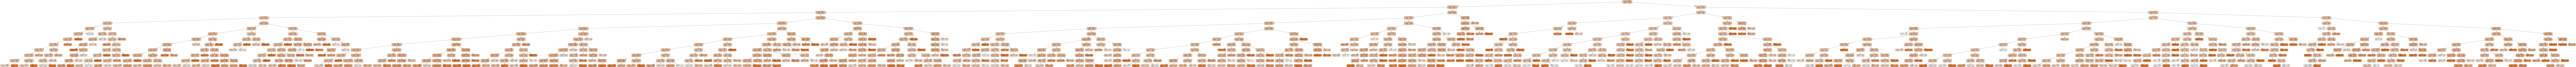

In [32]:
sub_tree_42 = clf2.best_estimator_[0, 0]
from sklearn.tree import export_graphviz, export_text
from sklearn.tree import _tree
# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)

graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('output/out.png').write_bytes(png)
# Display
Image(png)

In [33]:
clf2.predict(kek_data[0:100])

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int32)

In [34]:
clf2.predict_proba(kek_data[0:100])

array([[0.32154519, 0.67845481],
       [0.77626435, 0.22373565],
       [0.38489394, 0.61510606],
       [0.46479681, 0.53520319],
       [0.34046667, 0.65953333],
       [0.54270295, 0.45729705],
       [0.3236935 , 0.6763065 ],
       [0.36388898, 0.63611102],
       [0.68206624, 0.31793376],
       [0.59009617, 0.40990383],
       [0.32733461, 0.67266539],
       [0.20775527, 0.79224473],
       [0.12289635, 0.87710365],
       [0.75942789, 0.24057211],
       [0.83698453, 0.16301547],
       [0.26745892, 0.73254108],
       [0.36388898, 0.63611102],
       [0.08240853, 0.91759147],
       [0.22322406, 0.77677594],
       [0.36839983, 0.63160017],
       [0.45953222, 0.54046778],
       [0.57677869, 0.42322131],
       [0.19208619, 0.80791381],
       [0.1026187 , 0.8973813 ],
       [0.60604243, 0.39395757],
       [0.94825321, 0.05174679],
       [0.4004268 , 0.5995732 ],
       [0.18571905, 0.81428095],
       [0.32665441, 0.67334559],
       [0.44495322, 0.55504678],
       [0.

In [35]:
print( clf2.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 0.001, 'n_estimators': 12}


In [36]:
clf2.best_estimator_.predict_proba(kek_data[9:20])

array([[0.59009617, 0.40990383],
       [0.32733461, 0.67266539],
       [0.20775527, 0.79224473],
       [0.12289635, 0.87710365],
       [0.75942789, 0.24057211],
       [0.83698453, 0.16301547],
       [0.26745892, 0.73254108],
       [0.36388898, 0.63611102],
       [0.08240853, 0.91759147],
       [0.22322406, 0.77677594],
       [0.36839983, 0.63160017]])

In [37]:
y = clf2.best_estimator_[0, 0].predict(kek_data[9:19].values.tolist())*0
#y = gb_clf.decision_function(kek_data[9:20])

rate = clf2.best_params_['learning_rate']
print(rate)
for i in range(0,10):
    sub_tree = clf2.best_estimator_[i, 0]
    y += rate*sub_tree.predict(kek_data[9:19].values.tolist())
print(y)
print(gb_clf.decision_function(kek_data[9:20]))
z=y
for i in range(len(z)): 
    z[i] = 1./(1+np.exp(-z[i]))
print(z)

0.2
[-0.32879872  0.8401289   1.30805565  1.76772775 -0.98241326 -1.51706429
  0.80018033  0.51457436  1.74780195  0.89084075]
[-0.68903322 -0.73052284 -0.78768943 -0.88580458 -1.0189293  -0.97743968
 -0.68903322 -0.68903322 -0.97347013 -0.7964718  -0.68903322]
[0.41853294 0.69849236 0.78718761 0.85417487 0.2724132  0.17989422
 0.69001305 0.6258782  0.85167535 0.70906364]


In [38]:
best_gbc = clf2.best_estimator_

In [39]:
n_estim = best_gbc.n_estimators

In [40]:
learning_rate = best_gbc.learning_rate
print(clf2.decision_function(kek_data[9:19]))
arr = clf2.decision_function(kek_data[9:19])
print(1./(1.+np.exp(-arr)))
#tree_scores = [best_gbc.estimators_[i, 0].decision_function(kek_data[9:19].values.tolist()) for i in range(10)]
print(learning_rate)

[-0.36436297  0.72026509  1.33850956  1.96528385 -1.14954552 -1.6359605
  1.00755345  0.55852429  2.41006334  1.24697594]
[0.40990383 0.67266539 0.79224473 0.87710365 0.24057211 0.16301547
 0.73254108 0.63611102 0.91759147 0.77677594]
0.2


In [41]:
log_odds_predictions = []
for tree in clf2.best_estimator_:
    # For each tree, get the predicted values for each sample
    leaf_indices = tree[0].apply(kek_data[9:19].values.tolist())  # Get the leaf indices for the training data
    leaf_values = tree[0].tree_.value  # Get the values at each leaf

    # Average the values for each leaf to interpret them as log odds
    predicted_log_odds = [leaf_values[leaf_indices[i]].mean() for i in range(len(kek_data[9:19]))]
    log_odds_predictions.append(predicted_log_odds)

In [42]:
print(log_odds_predictions)

[[-0.19979086948717437, 1.013844714686623, 1.8586114631742008, 1.5891419997271858, 1.635836053681538, -1.4762202452512623, 1.422219429350073, 0.5188662208704848, 1.8941151655768824, -1.1381611294514293], [0.7407236048399549, 0.5634355943906658, 1.9433247320925873, 2.097075803896331, -1.5444254941898572, -0.42663891005745647, 0.4441826419632454, 0.4441826419632454, -0.534112266895102, 0.11112383139785188], [-0.6860477812270207, 0.09307681052837918, 1.7666368395402015, 2.2197219996826627, -1.1223908050433413, -1.2421490496272276, -0.011650342487034934, 0.25686702416450535, 1.8859294936506805, 0.9778410296483151], [-0.6060895044629423, 0.3025709074898646, -0.16860217529592805, 2.0390445683465246, -1.2641077790679682, -1.196960832721324, 0.15895340016464826, 0.4426447499390717, -0.33568600697714723, 0.8929174947583371], [0.2112598336507992, 0.6180953881413086, 0.7745467261766137, -0.822937746581979, -0.7935687743320976, -0.7956412632135905, 0.2112598336507992, 0.09521255793088462, 2.091594

In [43]:
rate = clf2.best_params_['learning_rate']
myarr = [log_odds_predictions[i][0] for i in range(10)]
print(rate,rate*sum(myarr))
print(clf2.decision_function(kek_data[9:19]))

0.2 -0.3287987236915968
[-0.36436297  0.72026509  1.33850956  1.96528385 -1.14954552 -1.6359605
  1.00755345  0.55852429  2.41006334  1.24697594]


In [44]:
print(best_gbc.estimators_.shape[0])
print(best_gbc.estimators_.shape[1])
y = []
for i in range(10):
    y0=[]
    for j in range(n_estim):
        sub_tree = clf2.best_estimator_[j, 0]
        y0.append(sub_tree.predict(kek_data[9+i:10+i].values.tolist())[0])
    y.append(y0)
print(y)

12
1
[[-0.19979086948717437, 0.7407236048399549, -0.6860477812270207, -0.6060895044629423, 0.2112598336507992, -0.6744087042489033, 0.062313395037184534, 0.4641929710642286, -0.5275259111274515, -0.42862065249665887, 0.03495525188089554, -0.21277649371938318], [1.013844714686623, 0.5634355943906658, 0.09307681052837918, 0.3025709074898646, 0.6180953881413086, 0.37037538416904653, 0.4723794276923754, 0.013299538544619838, 0.20292438247369796, 0.550642342720266, -0.05531887396066971, -0.5440001613400532], [1.8586114631742008, 1.9433247320925873, 1.7666368395402015, -0.16860217529592805, 0.7745467261766137, 0.3681797202834457, -0.8636480405814175, -0.5237702303814733, -0.1676224955067939, 1.5526216995146214, -0.958651425773226, 1.1109209658972246], [1.5891419997271858, 2.097075803896331, 2.2197219996826627, 2.0390445683465246, -0.822937746581979, -0.4533775547325258, -0.5704526318053, 1.7166580259617357, -0.21625589186029268, 1.2400201631289132, -0.4828987785174448, 1.4706793171001769], [

In [45]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 5)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 5)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if ( "
        
        for p in path[:-1]:
            if rule != "if ( ":
                rule += " && "
            rule += str(p)
        rule += " ) "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [46]:
import numpy as np
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if  "
        
        for p in path[:-1]:
            if rule != "if  ":
                rule += " if "
            rule += str(p)
        rule += "  "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [47]:
#print(f"double mytree{list(kek_data.columns)}")
print('{')
for iestim in range(n_estim):
    print(f"    if (iestim == {iestim})")
    print('    {')
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
    print('    }')
print ('    return -9999;')
print('};')

{
    if (iestim == 0)
    {
        if  (x[14] <= -5.943359375) if (x[30] <= -3.5673828125) if (x[2] > -0.618896484375) if (x[26] <= -20.5703125) if (x[5] <= -8.53515625) if (x[0] <= 0.0) if (x[13] <= -4.689453125) if (x[1] <= -0.0066890716552734375) if (x[1] <= -0.0549468994140625) if (x[2] > -0.0449066162109375) if (x[19] <= 3.7451171875) if (x[25] <= -14.41796875)   return 0.5188662208704848;  // | based on 971,668 samples
        if  (x[14] <= -5.943359375) if (x[30] <= -3.5673828125) if (x[2] > -0.618896484375) if (x[26] <= -20.5703125) if (x[5] <= -8.53515625) if (x[0] > 0.0) if (x[2] <= 4.150390625) if (x[22] <= -3.7568359375) if (x[14] <= -7.298828125) if (x[27] <= 58.671875) if (x[1] <= -0.0587310791015625) if (x[27] <= 1.06298828125)   return 0.4765228878001008;  // | based on 872,028 samples
        if  (x[14] <= -5.943359375) if (x[30] <= -3.5673828125) if (x[2] > -0.618896484375) if (x[26] <= -20.5703125) if (x[5] <= -8.53515625) if (x[0] > 0.0) if (x[2] <= 4.150390625) i

In [48]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " : "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f"  # | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [49]:
print(f"def mytree( iestim,  x ) :")
for iestim in range(n_estim):
    print(f"    if iestim == {iestim}:")
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
print ('    return -9999')

def mytree( iestim,  x ) :
    if iestim == 0:
        if (x[14] <= -5.943359375) and (x[30] <= -3.5673828125) and (x[2] > -0.618896484375) and (x[26] <= -20.5703125) and (x[5] <= -8.53515625) and (x[0] <= 0.0) and (x[13] <= -4.689453125) and (x[1] <= -0.0066890716552734375) and (x[1] <= -0.0549468994140625) and (x[2] > -0.0449066162109375) and (x[19] <= 3.7451171875) and (x[25] <= -14.41796875) :  return 0.5188662208704848  # | based on 971,668 samples
        if (x[14] <= -5.943359375) and (x[30] <= -3.5673828125) and (x[2] > -0.618896484375) and (x[26] <= -20.5703125) and (x[5] <= -8.53515625) and (x[0] > 0.0) and (x[2] <= 4.150390625) and (x[22] <= -3.7568359375) and (x[14] <= -7.298828125) and (x[27] <= 58.671875) and (x[1] <= -0.0587310791015625) and (x[27] <= 1.06298828125) :  return 0.4765228878001008  # | based on 872,028 samples
        if (x[14] <= -5.943359375) and (x[30] <= -3.5673828125) and (x[2] > -0.618896484375) and (x[26] <= -20.5703125) and (x[5] <= -8.53515625) and

In [50]:
def mytree(x,y):
    return 0

In [51]:
def mygradboost (x_in, lerning_rate = 0.2):
    prob = 0
    for iestim in range (n_estim):
        prob+=lerning_rate*mytree(iestim, x_in)
    return 1. / ( 1. + np.exp( - prob ) )


In [52]:
def mybdt(x, prob):
    if mygradboost(x)>prob: return 1
    return  

In [53]:
kek_data[9:19].values.tolist()[0][20]

-99.0

In [54]:
iestim = 10
sub_tree = clf2.best_estimator_[iestim, 0]
y = sub_tree.predict(kek_data[9:10].values.tolist())
print(y)
print(kek_data[9+i:10+i].values.tolist()[0][15])
myf = [mytree(iestim, kek_data[9+i:10+i].values.tolist()[0]) for i in range(1)]
print(myf)

[0.03495525]
-23.046875
[0]


In [55]:
input_x = [ kek_data[9:19].values.tolist()[0][i] for i in range(len(kek_data[9:19].values.tolist()[0])) ]
print(input_x)

[-1.0, 0.1153564453125, -1.3896484375, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0]


In [56]:
iestim = 9
sub_tree = clf2.best_estimator_
y = sub_tree.predict_proba(kek_data[9:19].values.tolist())
y = [y[i][1] for i in range(len(y))]
print(y)

myf = [mygradboost(kek_data[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[0.409903825246618, 0.6726653892656178, 0.7922447315901789, 0.8771036499642284, 0.2405721053152172, 0.16301546839517225, 0.7325410816923856, 0.6361110205823702, 0.9175914713091436, 0.7767759437506525]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [57]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['Charge', 'reconpt', 'sdphi0', 'SecondHitPhiR0', 'SecondHitPhiL0', 'SecondHitTheR0', 'SecondHitTheL0', 'SecondHitPhiR01', 'SecondHitPhiL01', 'SecondHitTheR01', 'SecondHitTheL01', 'SecondHitPhiR1', 'SecondHitPhiL1', 'SecondHitTheR1', 'SecondHitTheL1', 'SecondHitPhiR11', 'SecondHitPhiL11', 'SecondHitTheR11', 'SecondHitTheL11', 'SecondHitPhiR2', 'SecondHitPhiL2', 'SecondHitTheR2', 'SecondHitTheL2', 'SecondHitPhiR21', 'SecondHitPhiL21', 'SecondHitTheR21', 'SecondHitTheL21', 'SecondHitPhiR3', 'SecondHitPhiL3', 'SecondHitTheR3', 'SecondHitTheL3', 'SecondHitPhiR31', 'SecondHitPhiL31', 'SecondHitTheR31', 'SecondHitTheL31']
35
